In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('./titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data=data.drop('Cabin',axis=1)
data=data.drop('Embarked',axis=1)

In [6]:
data.Age=data.Age.fillna(data.Age.mean())

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
dtype: int64

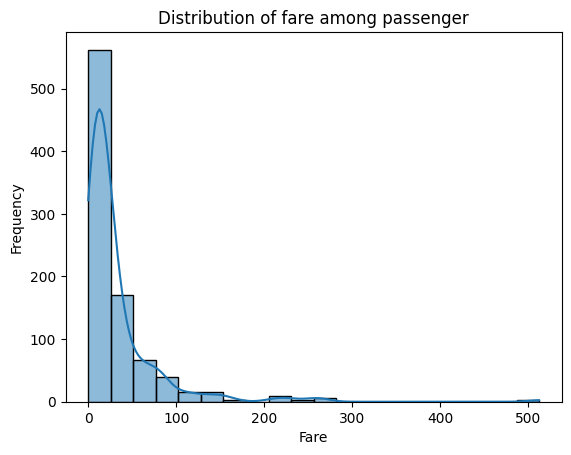

In [9]:
sns.histplot(data.Fare,bins=20,kde=True)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of fare among passenger")
plt.show()

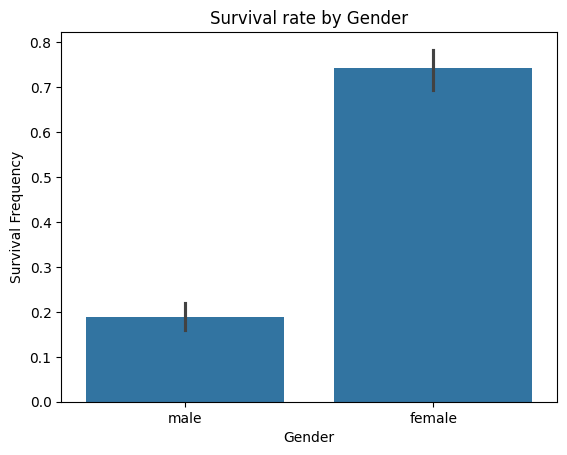

In [10]:
sns.barplot(x=data.Sex,y=data.Survived)
plt.xlabel("Gender")
plt.ylabel("Survival Frequency")
plt.title("Survival rate by Gender")
plt.show()

In [11]:
data['age_group'] = pd.cut(data['Age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55], labels=['0-5', '6-10', '11-15', '16-20','21-25','26-30','31-35','36-40','41-45','46,50','50+'])


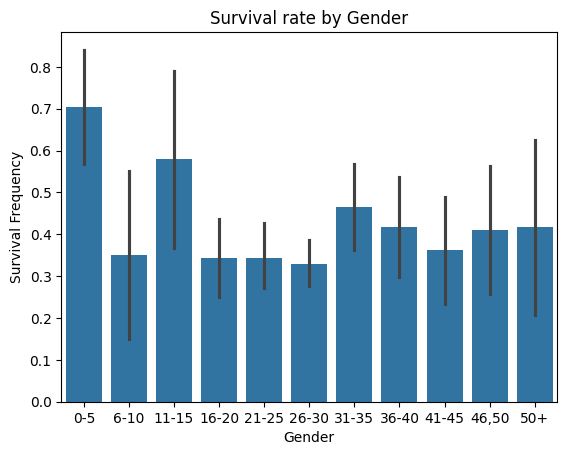

In [12]:
sns.barplot(x=data.age_group,y=data.Survived)
plt.xlabel("Gender")
plt.ylabel("Survival Frequency")
plt.title("Survival rate by Gender")
plt.show()

Assignment 9


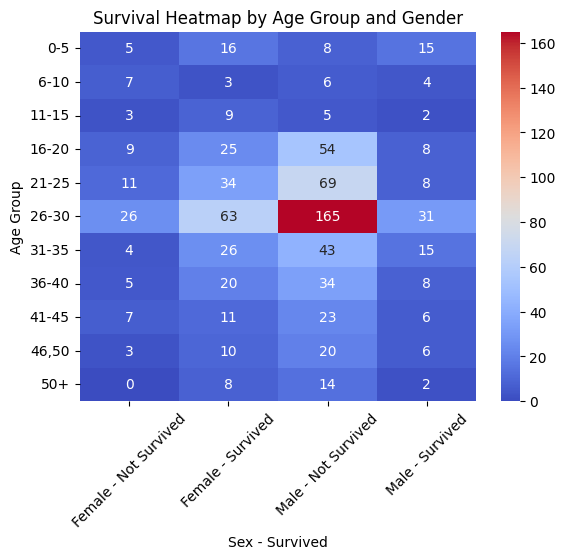

In [13]:
sns.heatmap(data=data.pivot_table(index='age_group', columns=['Sex', 'Survived'], aggfunc='size'), cmap='coolwarm', annot=True, fmt='g')
plt.xlabel('Sex - Survived')
plt.ylabel('Age Group')
plt.title('Survival Heatmap by Age Group and Gender')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Female - Not Survived', 'Female - Survived', 'Male - Not Survived', 'Male - Survived'])
plt.xticks(rotation=45)
plt.show()

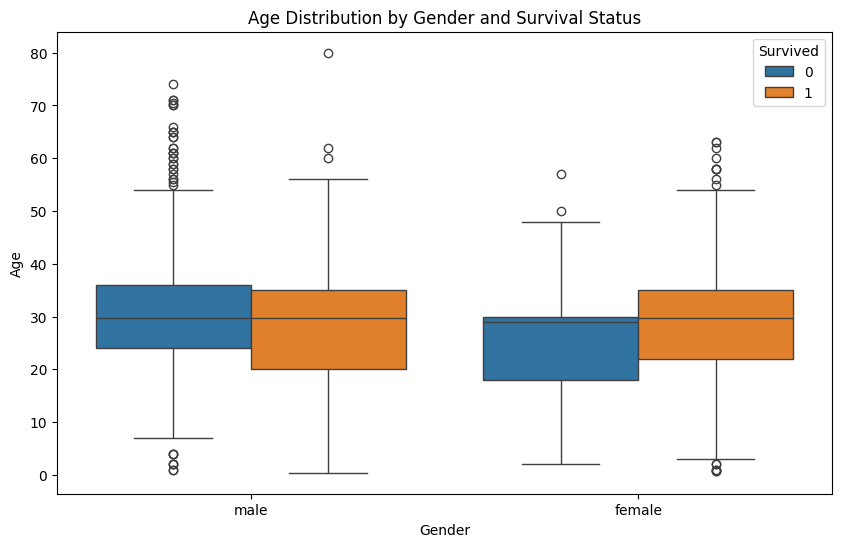

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender and Survival Status')
plt.legend(title='Survived', loc='upper right')
plt.show()